**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Agrupamiento Espectral

## Lectura de Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import io
import requests
import time

In [ ]:
urls = ["https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/9.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/10.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/11.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/12.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/13.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/14.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/15.csv"]

In [ ]:
fuentes = [r'1.csv',
           r'2.csv',
           r'3.csv',
           r'4.csv',
           r'5.csv',
           r'6.csv',
           r'7.csv',
           r'8.csv',
           r'9.csv',
           r'10.csv',
           r'11.csv',
           r'12.csv',
           r'13.csv',
           r'14.csv',
           r'15.csv']

In [ ]:
Inception = zip(urls, fuentes)

In [ ]:
def download_url(args):
    t0 = time.time()
    url, fn = args[0], args[1]
    try:
        r = requests.get(url)
        with open(fn, 'wb') as f:
            f.write(r.content)
        return(url, time.time() - t0)
    except Exception as e:
        print('Exception in download_url():', e)

In [ ]:
t0 = time.time()
for i in Inception:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv time: 0.14820027351379395
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv time: 0.14397549629211426
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv time: 0.0985116958618164
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv time: 0.1291506290435791
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv time: 0.10054326057434082
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv time: 0.14065265655517578
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv time: 0.11778855323791504
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv time: 0.12747669219970703
url: https://raw.githubusercontent.com/javierfernandobotia

In [ ]:
data = pd.concat(map(pd.read_csv, ['1.csv','2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv',
                                   '11.csv', '12.csv', '13.csv', '14.csv', '15.csv'], ','), ignore_index = True, sort = False, axis = 1)
display(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  sort=sort,


,0,1,2,3
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
data = pd.DataFrame(data.values, columns = ['Time(s)', 'x acceleration', 'y acceleration', 'z acceleration'])
display(data)

,Time(s),x acceleration,y acceleration,z acceleration
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
TIME = data['Time(s)']
X = data[['x acceleration','y acceleration', 'z acceleration']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler(feature_range = (0,1))
X_norm = MM.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = ['x acceleration','y acceleration', 'z acceleration'])

## Primera Aplicación del Algoritmo Espectral

In [ ]:
!pip install validclust

In [ ]:
from sklearn.cluster import SpectralClustering # Agrupamiento Espectral
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin
from sklearn.metrics import pairwise_distances
from validclust.indices import dunn # Método de validación Dunn
import seaborn as sns

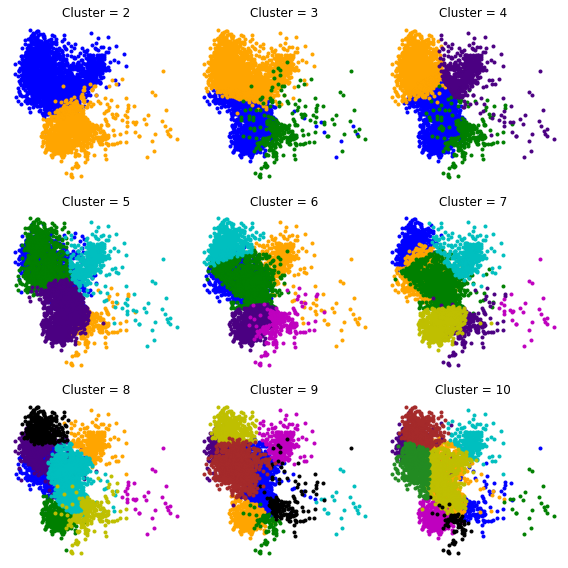

In [ ]:
x1 = X_norm['x acceleration']
x2 = X_norm['y acceleration']
feature_A = 0
feature_B = 1

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Modelos = []
Vector_Clases = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Espectral = SpectralClustering(n_clusters = ncenters, eigen_solver = 'arpack', n_components = ncenters, 
                                        n_init = 10, gamma = 1, affinity='rbf', eigen_tol = 1e-3, assign_labels='kmeans')
  Modelo_Espectral.fit(X_norm)
  Clases = Modelo_Espectral.labels_
  Modelos.append(Modelo_Espectral)
  Vector_Clases.append(Clases)
  
  Silueta.append(silhouette_score(X_norm, Clases))
  CH.append(calinski_harabasz_score(X_norm, Clases))
  DB.append(davies_bouldin_score(X_norm, Clases))
  dist = pairwise_distances(X_norm)
  DU.append(dunn(dist,Clases))
  
  for j in range(ncenters):
    ax.plot(x1[Clases == j], x2[Clases == j], '.', color = colors[j])
  
  ax.set_title('Cluster = {0}'.format(ncenters))
  ax.axis('off')

fig1.tight_layout()
plt.show()

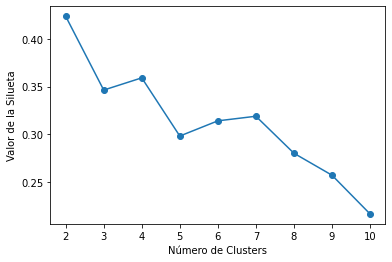

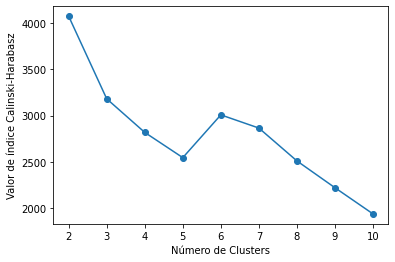

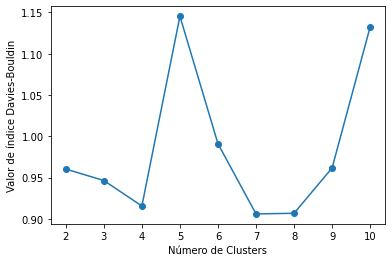

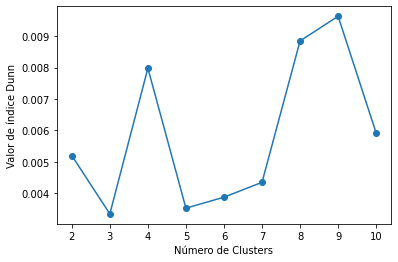

In [ ]:
fig3, ax3 = plt.subplots()
ax3.plot(np.r_[2:11], Silueta, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de la Silueta")

fig4, ax4 = plt.subplots()
ax4.plot(np.r_[2:11], CH, marker = 'o')
ax4.set_xlabel("Número de Clusters")
ax4.set_ylabel("Valor de índice Calinski-Harabasz")

fig5, ax5 = plt.subplots()
ax5.plot(np.r_[2:11], DB, marker = 'o')
ax5.set_xlabel("Número de Clusters")
ax5.set_ylabel("Valor de índice Davies-Bouldin")
plt.show()

fig6, ax6 = plt.subplots()
ax6.plot(np.r_[2:11], DU, marker = 'o')
ax6.set_xlabel("Número de Clusters")
ax6.set_ylabel("Valor de índice Dunn")
plt.show()

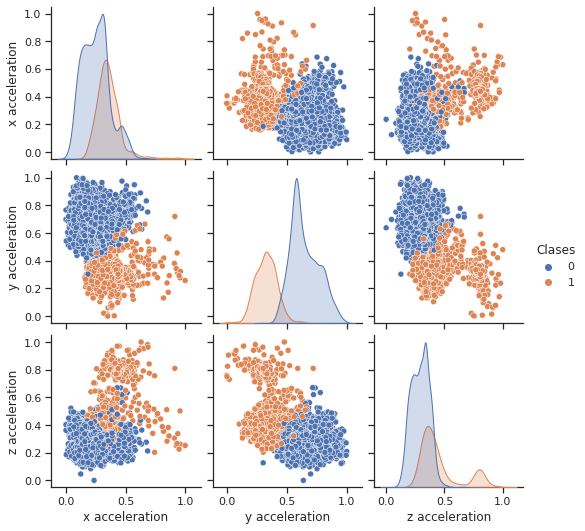

In [ ]:
data_concatenada = pd.concat([X_norm,pd.DataFrame(Vector_Clases[0], columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada, hue = 'Clases')
plt.show()

In [ ]:
Modelo_Seleccionado = Modelos[0]
Matriz_Afinidad = Modelo_Seleccionado.affinity_matrix_
print("Tamaño de la Matriz de Afinidad (Muestras x Muestras)= ", Matriz_Afinidad.shape)
print("\n")
print(Matriz_Afinidad)

Tamaño de la Matriz de Afinidad (Muestras x Muestras)=  (5068, 5068)


[[1.         0.98999066 0.97326282 ... 0.98228283 0.98025603 0.99137218]
 [0.98999066 1.         0.99180383 ... 0.95288176 0.95215322 0.96747705]
 [0.97326282 0.99180383 1.         ... 0.92858712 0.92859534 0.94697927]
 ...
 [0.98228283 0.95288176 0.92858712 ... 1.         0.9996542  0.99815364]
 [0.98025603 0.95215322 0.92859534 ... 0.9996542  1.         0.99722492]
 [0.99137218 0.96747705 0.94697927 ... 0.99815364 0.99722492 1.        ]]


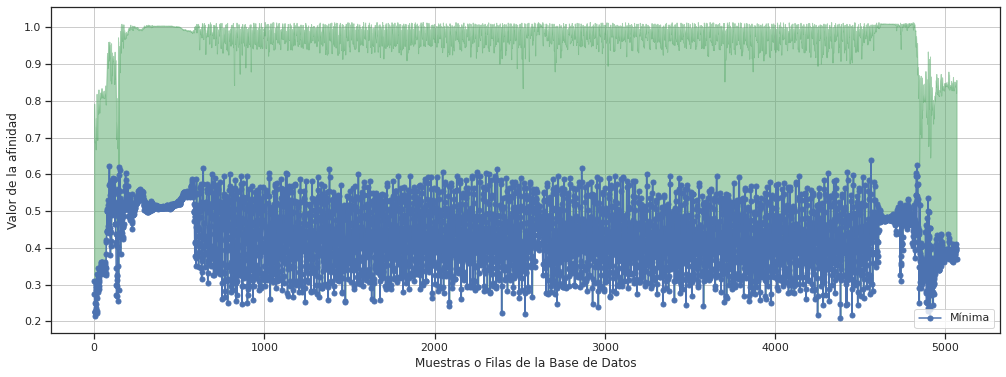

In [ ]:
# Remover la diagonal principal
m = Matriz_Afinidad.shape[0]
strided = np.lib.stride_tricks.as_strided
s0,s1 = Matriz_Afinidad.strides
Matriz_Afinidad_Sin_Diag_Principal = strided(Matriz_Afinidad.ravel()[1:], shape=(m-1,m), strides=(s0+s1,s1)).reshape(m,-1)
# Calcular la mínima y máxima afinidad
Maxima_Minima_Afinidad = [np.min(Matriz_Afinidad_Sin_Diag_Principal, axis = 1), np.max(Matriz_Afinidad_Sin_Diag_Principal, axis = 1)]
# Calculando los promedios de las mínimas y máximas afinidades
mean_afinidad = np.mean(Matriz_Afinidad_Sin_Diag_Principal, axis = 1)
std_afinidad = np.std(Matriz_Afinidad_Sin_Diag_Principal, axis = 1)
# Grafica de Análisis
ax = plt.figure(figsize = (17,6))
plt.plot(np.arange(0,m), Maxima_Minima_Afinidad[0], color = 'b', marker = 'o', markersize = 5, label = 'Mínima')
plt.fill_between(np.arange(0,m), Maxima_Minima_Afinidad[0], 
                 mean_afinidad + std_afinidad,
                 mean_afinidad - std_afinidad, 
                 alpha = 0.5, color = 'g')
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("Muestras o Filas de la Base de Datos")
plt.ylabel("Valor de la afinidad")
plt.show()

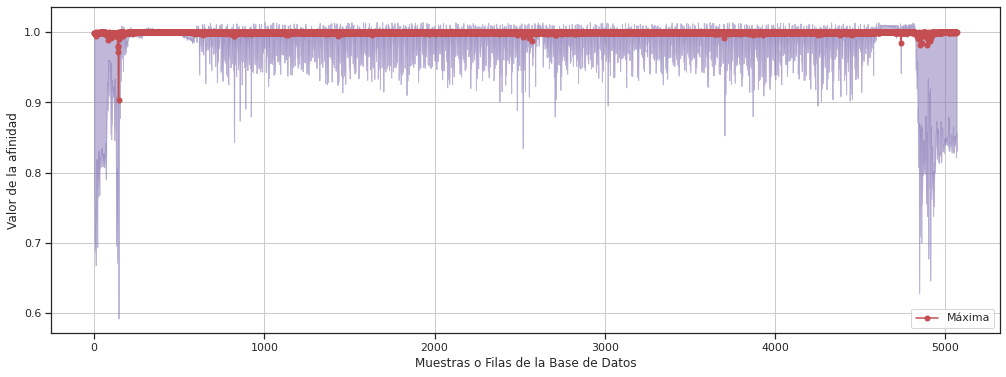

In [ ]:
# Grafica de Análisis
ax = plt.figure(figsize = (17,6))
plt.plot(np.arange(0,m), Maxima_Minima_Afinidad[1], color = 'r', marker = 'o', markersize = 5, label = 'Máxima')
plt.fill_between(np.arange(0,m), Maxima_Minima_Afinidad[1], 
                 mean_afinidad + std_afinidad,
                 mean_afinidad - std_afinidad, 
                 alpha = 0.5, color = 'm')
plt.grid()
plt.legend(loc = 'lower right')
plt.xlabel("Muestras o Filas de la Base de Datos")
plt.ylabel("Valor de la afinidad")
plt.show()

## Funciones Kernel para la Afinidad del Algoritmo Espectral

In [ ]:
Afinidad_Kernel = ['nearest_neighbors', 'rbf']
Gamma = [1e-2, 5e-2, 1e-1, 0.5, 1, 1.2, 1.3]
clusters = np.arange(0,8)

In [ ]:
KNN_Silueta, KNN_CH, KNN_DB  = {},{},{}
RBF_Silueta, RBF_CH, RBF_DB  = {},{},{}

In [ ]:
for g in enumerate(Gamma):
  for c in enumerate(clusters):
    modelo_SC_KNN = SpectralClustering(n_clusters = c[1] + 2, eigen_solver = 'arpack', n_components = c[1] + 2, 
                                        n_init = 10, gamma = g[1], affinity = Afinidad_Kernel[0], eigen_tol = 1e-3, assign_labels='kmeans')
    modelo_SC_RBF = SpectralClustering(n_clusters = c[1] + 2, eigen_solver = 'arpack', n_components = c[1] + 2, 
                                        n_init = 10, gamma = g[1], affinity = Afinidad_Kernel[1], eigen_tol = 1e-3, assign_labels='kmeans')
    modelo_SC_KNN.fit(X_norm) 
    modelo_SC_RBF.fit(X_norm)
    Clases_KNN = modelo_SC_KNN.labels_
    Clases_RBF = modelo_SC_RBF.labels_

    Silueta_SC_KNN = silhouette_score(X_norm, Clases_KNN)
    CH_SC_KNN = calinski_harabasz_score(X_norm, Clases_KNN)
    DB_SC_KNN = davies_bouldin_score(X_norm, Clases_KNN)

    Silueta_SC_RBF = silhouette_score(X_norm, Clases_RBF)
    CH_SC_RBF = calinski_harabasz_score(X_norm, Clases_RBF)
    DB_SC_RBF = davies_bouldin_score(X_norm, Clases_RBF)

    KNN_Silueta[str(g[1]) + " - " + str(c[1] + 2)] = Silueta_SC_KNN
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1]), "; Valor Silueta - KNN = ", Silueta_SC_KNN)
    KNN_CH[str(g[1]) + " - " + str(c[1] + 2)] = CH_SC_KNN
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1]), "; Valor CH - KNN = ", CH_SC_KNN)
    KNN_DB[str(g[1]) + " - " + str(c[1] + 2)] = DB_SC_KNN
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1]), "; Valor DB - KNN = ", DB_SC_KNN)

    RBF_Silueta[str(g[1]) + " - " + str(c[1] + 2)] = Silueta_SC_RBF
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1] + 2), "; Valor Silueta - RBF = ", Silueta_SC_KNN)
    RBF_CH[str(g[1]) + " - " + str(c[1] + 2)] = CH_SC_RBF
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1] + 2), "; Valor CH - RBF = ", CH_SC_RBF)
    RBF_DB[str(g[1]) + " - " + str(c[1] + 2)] = DB_SC_RBF
    print("Gamma = " + str(g[1]) + "; clusters = " + str(c[1]+ 2), "; Valor DB - RBF = ", DB_SC_RBF)

mejores_parametros_KNN_silueta = max(KNN_Silueta, key = KNN_Silueta.get)
mejores_parametros_KNN_CH = max(KNN_CH, key = KNN_CH.get)
mejores_parametros_KNN_DB = min(KNN_DB, key = KNN_DB.get)
mejores_parametros_RBF_silueta = max(RBF_Silueta, key = RBF_Silueta.get)
mejores_parametros_RBF_CH = max(RBF_CH, key = RBF_CH.get)
mejores_parametros_RBF_DB = min(RBF_DB, key = RBF_DB.get)

print("\n")
print("Mejores Parámetros Silueta - KNN: ", mejores_parametros_KNN_silueta)
print("Máximo valor de la Silueta - KNN, es: ", KNN_Silueta[mejores_parametros_KNN_silueta])
print("\n")
print("Mejores Parámetros - CH- KNN: ", mejores_parametros_KNN_CH)
print("Máximo valor CH - KNN, es: ", KNN_Silueta[mejores_parametros_KNN_CH])
print("\n")
print("Mejores Parámetros - KNN: ", mejores_parametros_KNN_DB)
print("Mínimo valor DB - KNN, es: ", KNN_DB[mejores_parametros_KNN_DB])
print("\n")
print("Mejores Parámetros Silueta - RBF: ", mejores_parametros_RBF_silueta)
print("Máximo valor de la Silueta - RBF, es: ", RBF_Silueta[mejores_parametros_RBF_silueta])
print("\n")
print("Mejores Parámetros - CH - RBF: ", mejores_parametros_RBF_CH)
print("Máximo valor CH - RBF, es: ", RBF_CH[mejores_parametros_RBF_CH])
print("\n")
print("Mejores Parámetros - DB - RBF: ", mejores_parametros_RBF_DB)
print("Mínimo valor DB - RBF, es: ", RBF_DB[mejores_parametros_RBF_DB])

Gamma = 0.01; clusters = 0 ; Valor Silueta - KNN =  0.4271145364952807
Gamma = 0.01; clusters = 0 ; Valor CH - KNN =  3953.3121730397556
Gamma = 0.01; clusters = 0 ; Valor DB - KNN =  0.9605216514060675
Gamma = 0.01; clusters = 2 ; Valor Silueta - RBF =  0.4271145364952807
Gamma = 0.01; clusters = 2 ; Valor CH - RBF =  4082.3999890499167
Gamma = 0.01; clusters = 2 ; Valor DB - RBF =  0.9636056402790364
Gamma = 0.01; clusters = 1 ; Valor Silueta - KNN =  0.40077679346123984
Gamma = 0.01; clusters = 1 ; Valor CH - KNN =  3287.0975389660525
Gamma = 0.01; clusters = 1 ; Valor DB - KNN =  0.7519323686867218
Gamma = 0.01; clusters = 3 ; Valor Silueta - RBF =  0.40077679346123984
Gamma = 0.01; clusters = 3 ; Valor CH - RBF =  2942.700413424035
Gamma = 0.01; clusters = 3 ; Valor DB - RBF =  1.0202047645264163
Gamma = 0.01; clusters = 2 ; Valor Silueta - KNN =  0.3679467593969869
Gamma = 0.01; clusters = 2 ; Valor CH - KNN =  3667.668610592206
Gamma = 0.01; clusters = 2 ; Valor DB - KNN =  0.89

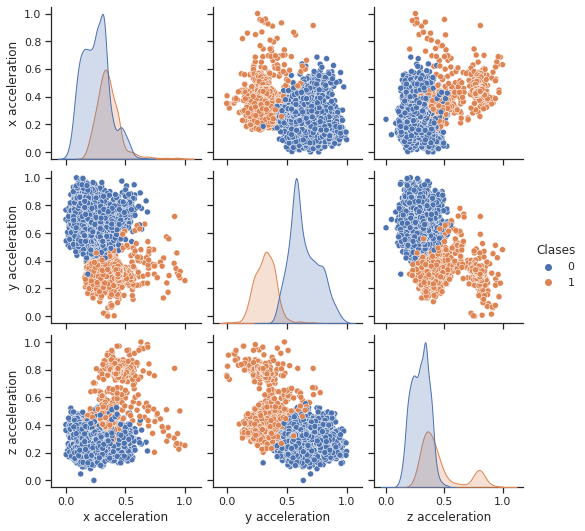

In [ ]:
Mejor_Modelo_Espectral_Silueta = SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', n_components = 2, 
                                        n_init = 10, gamma = 0.05, affinity='nearest_neighbors', eigen_tol = 1e-3, assign_labels='kmeans')
Mejor_Modelo_Espectral_Silueta.fit(X_norm)
Clases_Silueta = Mejor_Modelo_Espectral_Silueta.labels_
data_concatenada = pd.concat([X_norm,pd.DataFrame(Clases_Silueta, columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada, hue = 'Clases')
plt.show()

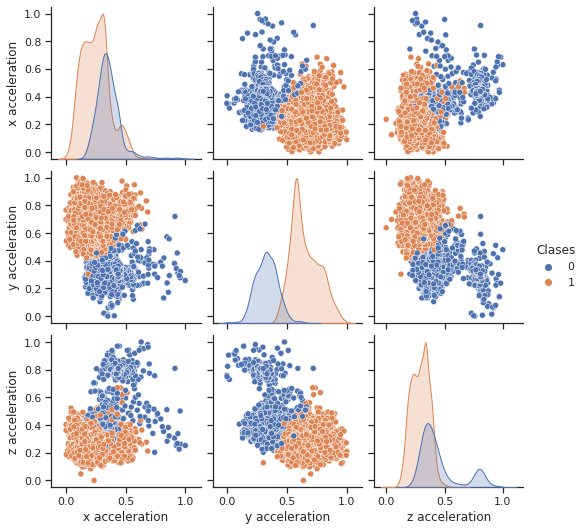

In [ ]:
Mejor_Modelo_Espectral_CH = SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', n_components = 2, 
                                        n_init = 10, gamma = 0.01, affinity='rbf', eigen_tol = 1e-3, assign_labels='kmeans')
Mejor_Modelo_Espectral_CH.fit(X_norm)
Clases_CH = Mejor_Modelo_Espectral_CH.labels_
data_concatenada = pd.concat([X_norm,pd.DataFrame(Clases_CH, columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada, hue = 'Clases')
plt.show()

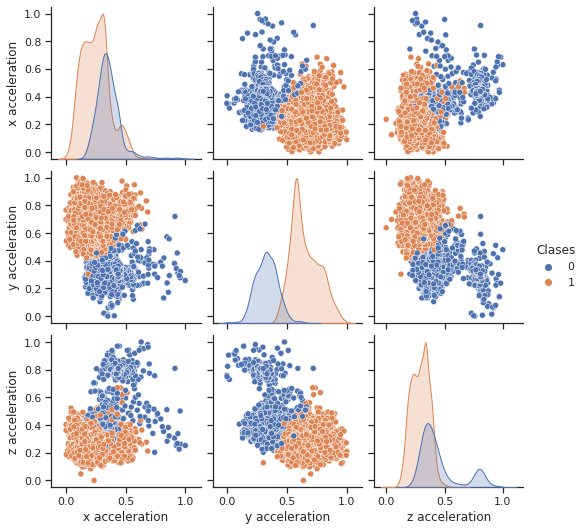

In [ ]:
Mejor_Modelo_Espectral_DB = SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', n_components = 2, 
                                        n_init = 10, gamma = 0.05, affinity='nearest_neighbors', eigen_tol = 1e-3, assign_labels='kmeans')
Mejor_Modelo_Espectral_DB.fit(X_norm)
Clases_DB = Mejor_Modelo_Espectral_CH.labels_
data_concatenada = pd.concat([X_norm,pd.DataFrame(Clases_DB, columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada, hue = 'Clases')
plt.show()